215
/home/workspace/user-workspace/143/mmdetection


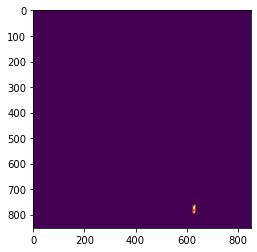

In [47]:
from os import listdir
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import numpy as np




label_path = "../train_label.csv"
image_path = "../train_image"


# bounding box가 직사각형이 아님.
with open(label_path, 'r') as l:
    l = pd.read_csv(l)
    length = []
    for file in (set(l["File"])):
        length.append((len(l[l["File"] == file])))
        
        if len(l[l["File"] == file]) >115:
            print(len(l[l["File"] == file]))
#     n_bins = 200
#     fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
#     axs.hist(length, bins=n_bins)

    
#     print(max(length))



# 001부터 400까지, 390..tif으로 되어있었음, 나머지 하나는 ipynb.checkpoint
# label은 39961, 한 장에 무려 평균 100개의 label이 있음.
#img는 852*852

img_list = listdir(image_path)

# for i in range(1,401):
#     name ="{0:0=3d}.tif".format(i)
#     img_list.remove(name)
    

# # 시각화
# idx = 50
# point1 = [106, 558]
# point2 = [175, 606]
# point3 = [169, 614]
# point4 = [100, 567]

# x_values1 = [point1[0], point2[0]]
# y_values1 = [point1[1], point2[1]]
# x_values2 = [point2[0], point3[0]]
# y_values2 = [point2[1], point3[1]]
# x_values3 = [point3[0], point4[0]]
# y_values3 = [point3[1], point4[1]]
# x_values4 = [point1[0], point4[0]]
# y_values4 = [point1[1], point4[1]]
# img = plt.imread(osp.join(image_path, "{0:0=3d}.tif".format(idx)))
# # print(img.shape)
# plt.plot(x_values1, y_values1, color='red')
# plt.plot(x_values2, y_values2, color='red')
# plt.plot(x_values3, y_values3, color='red')
# plt.plot(x_values4, y_values4, color='red')
# plt.imshow(img)


!pwd
img = plt.imread('./images_for_check/special.png')
plt.scatter(624 ,782,s=1,color='red')
plt.scatter(627 ,761,s=1,color='red')
plt.scatter(634 ,779,s=1,color='red')
plt.scatter(624 ,792,s=1,color='red')
plt.imshow(img)

# instance segmentation임
# 점 찍고 길이재서 경향보기 >> okay
# segmentation label 확인하고 만들기 >> okay
# 학습하기 
    # 학습 방법
    # 1) 그냥 단일 label instance segmentation으로 >> okay
    # 2) validation에 AP 만들기! >> okay
    # 3) fold 추가! >> okay
    

    
# inference 코드
    # test json >> okay
    # 최대 갯수 조정 >> okay 120이하 이고 하나만 215임. 일단 120으로
    #seg 나온 것에 점찍기 >> 점찍은 것을 바탕으로 길이재서 class 추측 >> okay

# 또는 multiclass로 + 길이정보 활용 # 후처리
# 튜닝: sota 해보기  >> okay
# mAP, 720mb이하, iou로 하겠다는 것임!

    

    

In [55]:
with open(label_path, 'r') as l:
    l = pd.read_csv(l)
    l['s1'] = (((l['X1'] - l['X2'])**2 + (l['Y1'] - l['Y2'])**2)**0.5) ###
    l['s2'] = (((l['X2'] - l['X3'])**2 + (l['Y2'] - l['Y3'])**2)**0.5)
    l['s3'] = (((l['X3'] - l['X4'])**2 + (l['Y3'] - l['Y4'])**2)**0.5) ###
    l['s4'] = (((l['X4'] - l['X1'])**2 + (l['Y4'] - l['Y1'])**2)**0.5)
    
#     for i in range(len(l['X1'])):
#         print(np.argmax([l['Y1'][i],l['Y2'][i],l['Y3'][i],l['Y4'][i]]))
    
    sides = l[['s1', 's2','s3','s4']]
    maxValueIndex = sides.idxmax(axis = 1)
    print((l['s2'].mean()))
    print((l['s2'].max()))
    print((l['s2'].min()))
    
    print(l['s4'].mean())
    print(l['s4'].max())
    print(l['s4'].min())
    print(maxValueIndex.value_counts())
    
    # 최대가 s1 아니면 s3임

    

10.073152747846564
11.661903789690601
4.47213595499958
10.076610403061263
11.704699910719626
1.0
s1    29072
s3    10889
dtype: int64


In [90]:
maxValues = sides.max(axis = 1)
print(maxValues)

label_list = []
for label in range(1,8):
    label_list.append(maxValues[l['Class']==label])
    
print("##########################################")
minmax_list = []
avg_list = []
for lbl, lbl_set in enumerate(label_list):
    minval = lbl_set.min()/852
    maxval = lbl_set.max()/852
    avg = sum(lbl_set)/len(lbl_set)
    avg = avg
    avg_list.append(avg)
    minmax_list.append((minval,maxval))
    print(f"{lbl+1}: {minval},{maxval}, {avg}")
for i in range(1, len(avg_list)):
    print(avg_list[i] -avg_list[i-1])
print("##########################################")
for idx in range(1,len(label_list)):
    avg = (minmax_list[idx][0] + minmax_list[idx-1][1])*0.5
    print(f"{idx-1}~{idx}:",avg)
    
    
    
# 중간값에서 끊기



0        84.053554
1        68.447060
2        59.413803
3        51.884487
4        35.468296
           ...    
39956    84.154620
39957    60.415230
39958    44.687806
39959    75.584390
39960    67.896981
Length: 39961, dtype: float64
##########################################
1: 0.040675407162355535,0.04315675190340431, 35.762313058822315
2: 0.05048312950142387,0.0531419315618393, 44.21602418194781
3: 0.05935068957638747,0.06168395935901837, 51.641195089356074
4: 0.06888981498041873,0.07154812513675197, 59.894900760857034
5: 0.07829615061107004,0.08101992889869633, 67.92642896075304
6: 0.08768320514375474,0.09001666426673245, 75.76919172639565
7: 0.09727632687790361,0.09981357570642864, 84.0081823726254
8.453711123125494
7.4251709074082655
8.25370567150096
8.031528199896009
7.842762765642604
8.238990646229752
##########################################
0~1: 0.04681994070241409
1~2: 0.05624631056911339
2~3: 0.06528688716971855
3~4: 0.074922137873911
4~5: 0.08435156702122554
5~6: 0.0

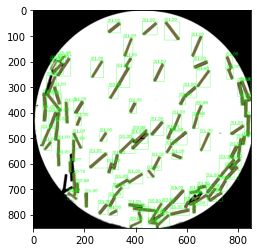

In [78]:
dir = "./mmdetection/inferenced_image/002.tif"
img = plt.imread(dir)
plt.imshow(img)

In [ ]:
#meta
[{'filename': '../test_image/047.tif', 
  'ori_filename': '047.tif', 
  'ori_shape': (852, 852, 3), 
  'img_shape': (800, 800, 3), 
  'pad_shape': (800, 800, 3), 
  'scale_factor': array([0.9389671, 0.9389671, 0.9389671, 0.9389671], dtype=float32), 
  'flip': False, 
  'flip_direction': None, 
  'img_norm_cfg': {'mean': array([103.53 , 116.28 , 123.675], dtype=float32), 
                   'std': array([1., 1., 1.], dtype=float32), 'to_rgb': False}}]

In [ ]:
result
bb 0 >> [[2.89762268e+02, 7.84025696e+02, 3.34972321e+02, 8.03600891e+02,
        2.84356326e-01], .....] #last is for probability
mask 1 >> (1, 100, 852, 852) # class,
https://mmdetection.readthedocs.io/en/latest/_modules/mmdet/core/mask/utils.html#encode_mask_results

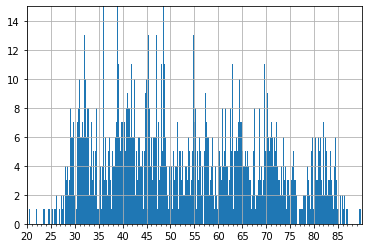

In [95]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# list1 = []
# with open("../your_file.txt", "r") as g:
#     for row in g:
#         list1.append(float(row)*852)
        
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# num_bins = 1000
# n, bins, patches = ax1.hist(list1, num_bins)
# plt.xlim((20,90))
# plt.ylim((0,50))

list2 = []
with open("../your_file2.txt", "r") as g:
    for row in g:
        list2.append(float(row)*852)
        
num_bins = 5000
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
n, bins, patches = ax.hist(list2, num_bins)
major_ticks = np.arange(20, 90, 5)
minor_ticks = np.arange(20, 90, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

plt.xlim((20,90))
plt.ylim((0,15))
plt.grid()
plt.show()


# test
# 
